<a href="https://colab.research.google.com/github/gabrielcn/Bike_Sharing/blob/main/cyclistic_bike_share_washington.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Compartilhamento de bicicletas em Washington - 2016 (Capitalbikeshare)***


In [ ]:
import pandas as pd #Importa a biblioteca pandas para ler o arquivo
import seaborn as sns #Importa a biblioteca seaborn
import matplotlib.pyplot as plt #Importa a bilbioteca matplotlib
import csv 
from datetime import datetime #operações para analisar datas

In [ ]:
df_was = pd.read_excel("Washington-2016-Summary.xlsx") #Atribui a uma variável 

In [ ]:
df_was

,duration,month,hour,day_of_week,user_type
0,7.123117e+15,3,22,Thursday,Subscriber
1,9.792517e+15,3,22,Thursday,Subscriber
2,6.632983e+15,3,22,Thursday,Subscriber
3,7.404700e+04,3,22,Thursday,Subscriber
4,1.301458e+16,3,22,Thursday,Subscriber
...,...,...,...,...,...
66321,1.542193e+16,10,8,Saturday,Subscriber
66322,6.355217e+15,10,5,Saturday,Subscriber
66323,1.763278e+16,10,2,Saturday,Subscriber
66324,3.377233e+16,10,0,Saturday,Subscriber


In [ ]:
df_was.shape #Formato da tabela

(66326, 5)

In [ ]:
df_was.columns = ["duracao" , "mes" , "hora" , "dia_semana", "tipo_usuario"] #renomear colunas [] lista (columns é um atributo do pandas)
df_was.head()

,duracao,mes,hora,dia_semana,tipo_usuario
0,7.123117e+15,3,22,Thursday,Subscriber
1,9.792517e+15,3,22,Thursday,Subscriber
2,6.632983e+15,3,22,Thursday,Subscriber
3,7.404700e+04,3,22,Thursday,Subscriber
4,1.301458e+16,3,22,Thursday,Subscriber


In [ ]:
df_was['mes'].unique() #Todos os valores que foram colocados na coluna mes

array([ 3,  2,  1,  4,  5,  6,  8,  7,  9, 12, 11, 10])

In [ ]:
df_was['mes'].value_counts() #Quantas vezes em cada mes

7     7341
6     7320
8     7198
9     6878
10    6792
5     5768
4     5602
3     5571
11    5214
12    3354
2     2854
1     2434
Name: mes, dtype: int64

In [ ]:
df_was['dia_semana'].value_counts() #Quantas vezes em cada dia

Wednesday    10103
Thursday      9984
Friday        9970
Tuesday       9748
Monday        9394
Saturday      8900
Sunday        8227
Name: dia_semana, dtype: int64

**Quantidade de viagens por dia no ano de 2016**

In [ ]:
qtd_viagem_por_dia_was = df_was['dia_semana'].value_counts() #Quantas vezes em cada dia

In [ ]:
qtd_viagem_por_dia_was #Washington

Wednesday    10103
Thursday      9984
Friday        9970
Tuesday       9748
Monday        9394
Saturday      8900
Sunday        8227
Name: dia_semana, dtype: int64

In [ ]:
qtd_viagem_por_dia_was.to_frame()

,dia_semana
Wednesday,10103
Thursday,9984
Friday,9970
Tuesday,9748
Monday,9394
Saturday,8900
Sunday,8227


In [ ]:
df_qtd_viagem_por_dia_was = qtd_viagem_por_dia_was.to_frame().reset_index()

In [ ]:
df_qtd_viagem_por_dia_was #Quantidade total de viagens por dia em 2016

,index,dia_semana
0,Wednesday,10103
1,Thursday,9984
2,Friday,9970
3,Tuesday,9748
4,Monday,9394
5,Saturday,8900
6,Sunday,8227


In [ ]:
df_qtd_viagem_por_dia_was.columns = ["dias", "total"]
df_qtd_viagem_por_dia_was

,dias,total
0,Wednesday,10103
1,Thursday,9984
2,Friday,9970
3,Tuesday,9748
4,Monday,9394
5,Saturday,8900
6,Sunday,8227


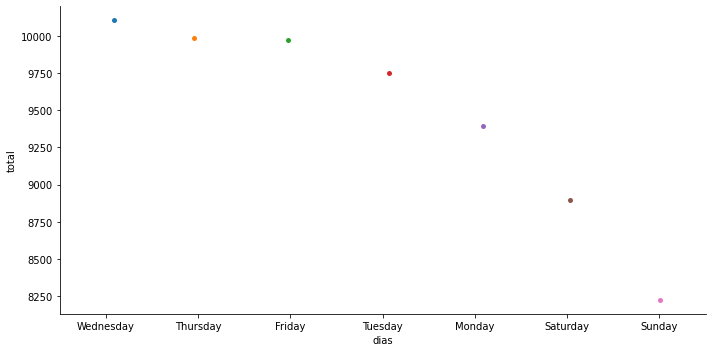

In [ ]:
sns.catplot(x="dias", y="total", data = df_qtd_viagem_por_dia_was, aspect = 2)

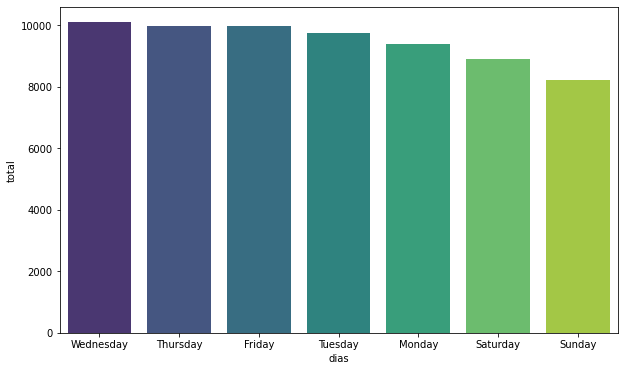

In [ ]:
plt.figure(figsize=(10,6)) #Configura o tamanho da figura (10 para direita e 6 para baixo)
sns.barplot(x="dias", y="total", data = df_qtd_viagem_por_dia_was, palette = "viridis") #pallete, atributo que permite escolher um palete de cor, no caso é viridis